In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.shape

(303, 14)

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: ylabel='sex'>

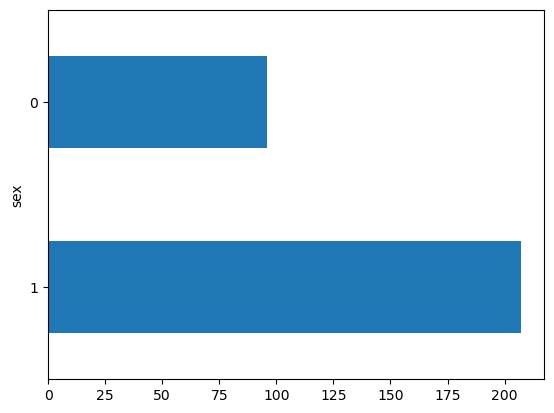

In [9]:
df['sex'].value_counts().plot(kind = 'barh')

<Axes: xlabel='sex'>

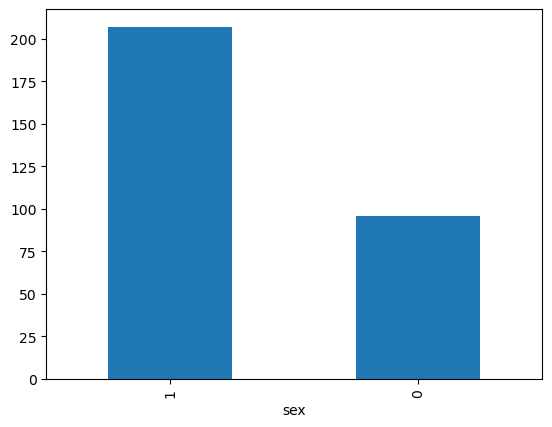

In [10]:
df['sex'].value_counts().plot(kind = 'bar')

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df['sex'].unique()

array([1, 0], dtype=int64)

In [13]:
x = df.drop ('age' , axis = 1)
y = df['age']

In [14]:
x,y

(     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0      1   3       145   233    1        0      150      0      2.3      0   
 1      1   2       130   250    0        1      187      0      3.5      0   
 2      0   1       130   204    0        0      172      0      1.4      2   
 3      1   1       120   236    0        1      178      0      0.8      2   
 4      0   0       120   354    0        1      163      1      0.6      2   
 ..   ...  ..       ...   ...  ...      ...      ...    ...      ...    ...   
 298    0   0       140   241    0        1      123      1      0.2      1   
 299    1   3       110   264    0        1      132      0      1.2      1   
 300    1   0       144   193    1        1      141      0      3.4      1   
 301    1   0       130   131    0        1      115      1      1.2      1   
 302    0   1       130   236    0        0      174      0      0.0      1   
 
      ca  thal  target  
 0     0     1       1  


In [37]:
x_train,x_test,y_train,y_test = train_test_split (x,y, test_size = 0.2)

In [38]:
model = LogisticRegression()

In [39]:
model.fit (x_train,y_train)

C:\Users\lab4\Anaconda3\anaconda raheen\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred = model.predict(x_test)

In [41]:
x_train

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
104,1,2,129,196,0,1,163,0,0.0,2,0,2,1
106,1,3,160,234,1,0,131,0,0.1,1,1,2,1
26,1,2,150,212,1,1,157,0,1.6,2,0,2,1
209,1,0,140,177,0,1,162,1,0.0,2,1,3,0
215,0,0,132,341,1,0,136,1,3.0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,1,0,112,230,0,1,160,0,0.0,2,1,2,0
236,1,0,125,300,0,0,171,0,0.0,2,2,3,0
166,1,0,120,229,0,0,129,1,2.6,1,2,3,0
206,1,0,110,239,0,0,142,1,1.2,1,1,3,0


In [42]:
y_train

104    50
106    69
26     59
209    59
215    43
       ..
261    52
236    58
166    67
206    59
252    62
Name: age, Length: 242, dtype: int64

In [43]:
len(x_train)

242

In [44]:
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[ 0.67663234,  0.95957525, -0.15029333, ..., -0.70244467,
        -0.52097176,  0.8977584 ],
       [ 0.67663234,  1.91520164,  1.70110328, ...,  0.28587864,
        -0.52097176,  0.8977584 ],
       [ 0.67663234,  0.95957525,  1.10387857, ..., -0.70244467,
        -0.52097176,  0.8977584 ],
       ...,
       [ 0.67663234, -0.95167752, -0.68779557, ...,  1.27420196,
         1.18274671, -1.11388543],
       [ 0.67663234, -0.95167752, -1.28502028, ...,  0.28587864,
         1.18274671, -1.11388543],
       [-1.47790748, -0.95167752,  0.38720891, ...,  2.26252527,
        -0.52097176, -1.11388543]])

In [46]:
accuracy_score (y_test,y_pred)

0.08196721311475409